In [1]:
import Laplin as lp
import numpy as np
import matplotlib.pyplot as plt

In [2]:
file = 'Amostra Porosa C/amostraporC_tratada.txt'
cpmg = lp.ExpData()
cpmg.loadFile(file,1,2)

In [3]:
for i in range(len(cpmg.x)):
    cpmg.x[i] *= 1e-3

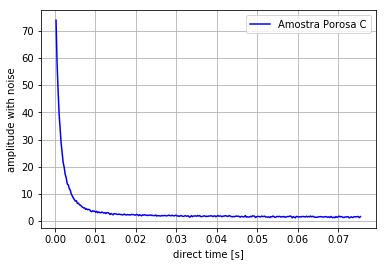

In [4]:
plt.plot(cpmg.x,cpmg.yn,'b-')
plt.xlabel('direct time [s]')
plt.ylabel('amplitude with noise')
plt.grid(True)
plt.legend(['Amostra Porosa C'],loc=0)
plt.savefig('Decay_porC.png',dpi=300)

O pico de intensidade ocorre para T2 = 0.1 +/- -499.945125062 ms.
O pico de intensidade ocorre para T2 = 0.705480231072 +/- 0.0657281854763 ms.
O pico de intensidade ocorre para T2 = 2.15443469003 +/- 0.200724381303 ms.
Amostra porosa C, com intervalo de 100 pontos entre 1e-4 e 1e0 do espaço inverso.


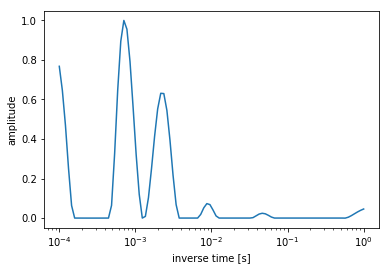

In [50]:
reg = lp.InvLaplace(cpmg, 0)
reg.genX(1e-4,1e0,100)
reg.genY([1e-4,1e-4,1e-4], 0, 'nn0')

N = max(reg.Y)
for j in range(len(reg.Y)):
    reg.Y[j] /= N

for k in range(len(reg.Y)-1):
    if reg.Y[k-1] < reg.Y[k] and reg.Y[k+1] < reg.Y[k] and reg.Y[k] > 0.2:
        print 'O pico de intensidade ocorre para T2 =', reg.X[k]/1e-3, '+/-', (reg.X[k+1] - reg.X[k-1])/2e-3, 'ms.'

print 'Amostra porosa C, com intervalo de', len(reg.X), 'pontos entre 1e-4 e 1e0 do espaço inverso.'

reg.plotData()

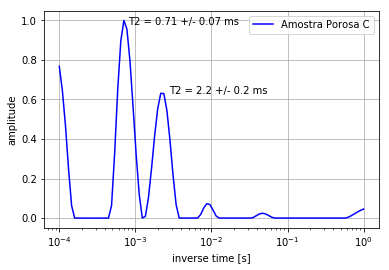

In [53]:
plt.plot(reg.X,reg.Y,'b-')
plt.xlabel('inverse time [s]')
plt.ylabel('amplitude')
plt.xscale('log')
plt.grid(True)
plt.legend(['Amostra Porosa C'], loc=0)
plt.text(8e-4, 0.98, 'T2 = 0.71 +/- 0.07 ms')
plt.text(2.8e-3, 0.63, 'T2 = 2.2 +/- 0.2 ms')
plt.savefig('porC_inverse.png', dpi=300)